# <font color =blue> Examen   </font>

Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

<font color = blue> - El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera. <font>


In [1]:
%matplotlib inline 

import sympy as sym
import numpy as np
import matplotlib.pylab as plt

from sympy import init_printing; init_printing(use_latex='mathjax')
from IPython.display import display
from IPython.display import HTML
from scipy.integrate import odeint

from sympy import *
from scipy.optimize import linprog


from ipywidgets import *

Ley_Newton_enfriamiento='<iframe src=https://es.wikipedia.org/wiki/Ley_del_enfriamiento_de_Newton?useformat=mobile width=700 height=350></iframe>'
Torricelli='<iframe src=https://en.wikipedia.org/wiki/Torricelli%27s_law?useformat=mobile width=700 height=350></iframe>'
Caidalibre ='<iframe src=https://es.wikipedia.org/wiki/Ca%C3%ADda_libre?useformat=mobile width=700 height=350></iframe>'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy 
from scipy import integrate
from scipy.optimize import minimize

# <font color =blue>Primer punto.</font>

## Introducción al problema. 

### Ley de Newton del enfriamiento

La ley empírica de Newton, relativa al enfriamiento de un objeto, se expresa con la ecuación diferencial lineal de primer orden

$$\frac{dT}{dt} = k(T - Tm) $$

donde $k$ es una constante de proporcionalidad, $T(t)$ es la temperatura del objeto cuando $t > 0$
y $T_m$ es la temperatura ambiente; o sea, la temperatura del medio que rodea al objeto. 

Supondremos que $T_m$ es constante.

### Para más información revise la siguiente pagina. 

In [3]:
HTML(Ley_Newton_enfriamiento)

HTML(value='<iframe src=https://es.wikipedia.org/wiki/Ley_del_enfriamiento_de_Newton?useformat=mobile width=70…

## <font color = red> Problema 1 <font>

### ¿Cuánto esperar para tomar el café?

Primero calentamos el agua a $80°C$. Posteriormente agregamos café al vaso con el agua caliente. Después realizamos la medición de la temperatura ambiente, la cual fue de $24°C$. Realiza las siguientes actividades:
]
1. (20 puntos) Simula el sistema en un tiempo de $0$ a $120$ unidades de tiempo  con una constante de proporcionalidad $k=-0.0565$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a $30°C$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para valores de $k >0$?
    - (5  puntos) Busca una constante de proporcionalidad $k$ en un rango ( de $-0.2$ a $0.2$ con incremento de 0.01), para la cual el cafe tiene una temperatura menor de $30°C$ en un tiempo a 20 minutos.

In [4]:
#Unidades
k=-0.0565
T0=80.0#celcius
Tm=24.0#celcius

In [5]:
t = np.linspace(0,120,120*5)#valores a evaluar

In [6]:
def cooling(T,t):
    dTdt=k*(T-Tm)
    return dTdt

### Solución ejercicio 1.1

In [7]:
T = odeint(cooling,T0,t)

### Solución ejercicio 1.2.a

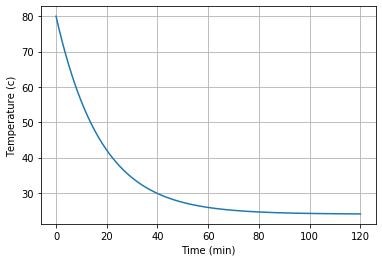

In [8]:
plt.figure(1)
plt.plot(t,T)
plt.xlabel('Time (min)')
plt.ylabel('Temperature (c)')
plt.grid()
plt.show()

### Solución ejercicio 1.2.b

In [9]:
def findT(n,T,t):
    Tmin=1
    tmin=1000
    for ti,Ti in zip(t,T):
        if(Ti!=np.nan):  
            if(np.abs(Ti-n)<Tmin):
                tmin=ti
                Tmin=Ti-n
    return tmin

In [10]:
print(findT(29.99,T,t))

39.46577629382304


### Solución ejercicio 1.3.a

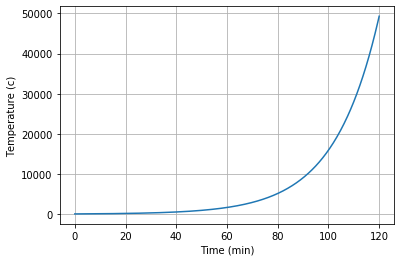

In [11]:
k=0.0565
T2 = odeint(cooling,T0,t)
plt.figure(1)
plt.plot(t,T2)
plt.xlabel('Time (min)')
plt.ylabel('Temperature (c)')
plt.grid()
plt.show()

Que la temperatura está en un aumento exponencial

### Solución ejercicio 1.3.b

In [12]:
for k in list(np.arange(0.2,-0.2,-0.01)):
    Tn = odeint(cooling,T0,t)
    if(findT(29.99,Tn,t)<20):
        print("k="+str(k)+" t="+str(findT(29.99,Tn,t)))
        break
    

k=-0.12000000000000027 t=18.631051752921536


## <font color = red> Problema 2 <font>  

### ¿Cuánto esperar para comenzar a comer pastel?

Al sacar un pastel del horno, su temperatura es $280°C$. Después de $3$ minutos, $2OO°C$. ¿En cuanto tiempo se enfriará hasta la temperatura ambiente de $28°C$? Realiza las siguientes actividades:

1. (20 puntos) Simula el sistema en un tiempo de $0$ a $60$ unidades de tiempo  con una constante de proporcionalidad $k=-0.14518$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a $150°C$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para valores de $k >0$?
    - (5  puntos) Busca una constante de proporcionalidad $k$ en un rango ( de $-0.2$ a $0.2$ con incremento de 0.01), para la cual el pastel se puede comer a una temperatura menor a $50°C$ en un tiempo a 10 minutos.

In [13]:
#Unidades
k=-0.14518
T0=280.0#celcius
Tm=28.0#celcius

In [14]:
t = np.linspace(0,60,60*5)#valores a evaluar

In [15]:
def cooling(T,t):
    dTdt=k*(T-Tm)
    return dTdt

### Solución ejercicio 2.1

In [16]:
T = odeint(cooling,T0,t)

### Solución ejercicio 2.2.a

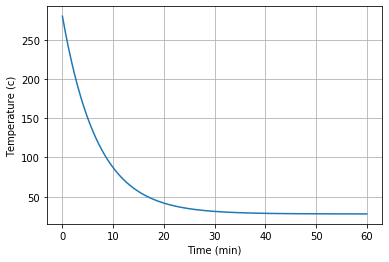

In [17]:
plt.figure(1)
plt.plot(t,T)
plt.xlabel('Time (min)')
plt.ylabel('Temperature (c)')
plt.grid()
plt.show()

### Solución ejercicio 2.2.b

In [18]:
def findT(n,T,t):
    Tmin=1
    tmin=1000
    for ti,Ti in zip(t,T):
        if(Ti!=np.nan):  
            if(np.abs(Ti-n)<Tmin):
                tmin=ti
                Tmin=Ti-n
    return tmin

In [19]:
print(findT(149.99,T,t))

5.016722408026756


### Solución ejercicio 2.3.a

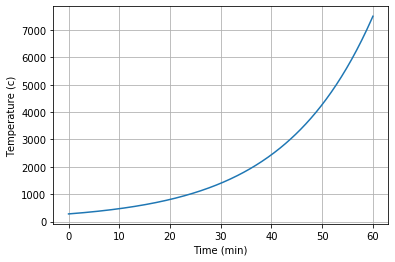

In [20]:
k=0.0565
T2 = odeint(cooling,T0,t)
plt.figure(1)
plt.plot(t,T2)
plt.xlabel('Time (min)')
plt.ylabel('Temperature (c)')
plt.grid()
plt.show()

Que la temperatura está en un aumento exponencial

### Solución ejercicio 2.3.b

In [21]:
for k in list(np.arange(0.2,-0.2,-0.01)):
    Tn = odeint(cooling,T0,t)
    if(findT(49.99,Tn,t)<10):
        print("k="+str(k)+" t="+str(findT(29.99,Tn,t)))
        break
    

No se cumple la propiedad dentro del rango

# <font color =blue>Segundo punto.</font>

## Introducción al problema. 

### Caída libre

En la caída libre ideal, se desprecia la resistencia aerodinámica que presenta el aire al movimiento del cuerpo, analizando lo que pasaría en el vacío. En esas condiciones, la aceleración que adquiriría el cuerpo sería debida exclusivamente a la gravedad, siendo independiente de su masa.

$$
\begin{eqnarray}
\frac{ds}{dt} &=& v \\
\frac{dv}{dt} &=& -g
\end{eqnarray}
$$

O visto el sistema en forma canónica

$$
\begin{eqnarray}
\dot{x}_1 &=& x_2 \\
\dot{x}_2 &=& -g
\end{eqnarray}
$$


### Para más información revise la siguiente pagina. 

In [22]:
HTML(Caidalibre)

HTML(value='<iframe src=https://es.wikipedia.org/wiki/Ca%C3%ADda_libre?useformat=mobile width=700 height=350><…

## <font color = red> Problema 3 <font>

### Deja caer una pelota

Desde un edificio de altura de $314$ metros se deja caer una pelota, que tarda 8 segundos en llegar al piso. ¿con que velocidad impacta la pelota contra el piso?


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $8$ unidades de tiempo  con una constante de gravedad $g=-9.8$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un segundo. ¿En que tiempo aproximadamente la pelota esta a la mitad del edificio?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para una posicion inicial de $314 m$ y una velocidad de $30 m/s$ ?
    - (5  puntos) ¿Que altura aproximadamente tendra en $10s$ para el incisio anterior?





In [23]:
#Unidades
g=-9.8#m/s^2
s0=314#m
v0=0#m/s
parameters=[v0,s0]

In [24]:
t = np.linspace(0,8,8*15)#valores a evaluar

In [25]:
def model(parameters,t):#Modelado de la velocidad
    return [g,parameters[0]]


### Solución ejercicio 3.1

In [26]:
sol = odeint(model,parameters,t)
v=sol[:,0]
s=sol[:,1]

### Solución ejercicio 3.2.a

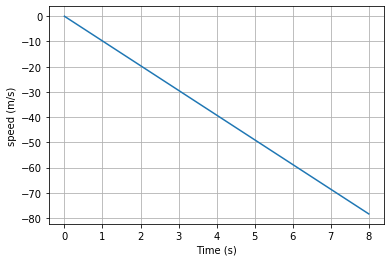

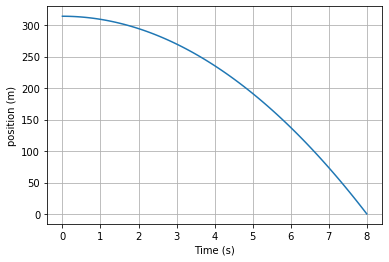

In [27]:
plt.figure(1)
plt.plot(t,v)
plt.xlabel('Time (s)')
plt.ylabel('speed (m/s)')
plt.grid()
plt.show()
plt.figure(2)
plt.plot(t,s)
plt.xlabel('Time (s)')
plt.ylabel('position (m)')
plt.grid()
plt.show()


### Solución ejercicio 3.2.b

In [28]:
def findh(n,h,t):
    hmin=1000
    tmin=1000
    for ti,hi in zip(t,h):
        if(hi!=np.nan):  
            if(np.abs(hi-n)<hmin):
                tmin=ti
                hmin=hi-n
    return tmin

In [29]:
print(findh(314/2,s,t))

5.647058823529411


### Solución ejercicio 3.3.a

In [30]:
s0=314#m
v0=30#m/s
parameters=[v0,s0]
t = np.linspace(0,10,10*15)#valores a evaluar

In [31]:
sol2 = odeint(model,parameters,t)
v2=sol2[:,0]
s2=sol2[:,1]

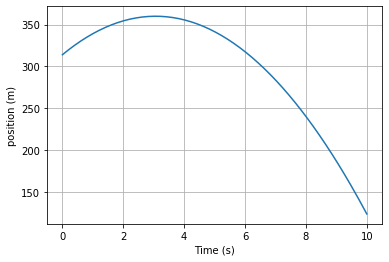

In [32]:
plt.figure(1)
plt.plot(t,s2)
plt.xlabel('Time (s)')
plt.ylabel('position (m)')
plt.grid()
plt.show()


Que la pelota sale disparada primero hacia arriba, por lo que tardará más en caer

### Solución ejercicio 3.3.b

In [33]:
print(s2[-1])

123.99999999934235


# <font color =blue>Tercer punto.</font>

## Introducción al problema. 

## Drenado de un tanque (Ley de Torricelli)

En hidrodinámica, la ley de Torricelli establece que la velocidad
$v$ de flujo de salida de agua a través de un orificio plano ubicado en la parte inferior
de un tanque lleno hasta una altura $h$ será igual a la velocidad que un cuerpo (en este caso
una gota de agua) adquiriría en caída libre desde una altura $h$; es decir, $v = \sqrt{2gh}$, donde $g$ es la aceleración debida a la gravedad.


Suponga que un tanque lleno de agua puede drenar mediante un orificio bajo la influencia de la gravedad. Deseamos encontrar la altura $h$ del agua restante en el tanque en el tiempo $t$.

Si el área del orificio es $A_h$ (en $m^2$) y la velocidad del agua que sale del tanque es $v = \sqrt{2gh}$ (en m/s), entonces el volumen del agua que abandona el tanque por segundo es $A_h \sqrt{2gh}$ (en $m^3$/s). De este modo, si $V(t)$ indica el volumen del agua que hay en el tanque en el tiempo $t$, la ecuación diferencial deseada para la altura del agua en el tiempo t:

$$\frac{dh}{dt} = - \frac{A_h}{A_w} \sqrt{2gh} $$


Donde $A_w$ (en $m^2$) representa el área constante de la superficie superior del agua.

Observe que aquí ignoramos la posibilidad de fricción en el orificio, la cual puede ocasionar una reducción en la velocidad del flujo en
dicho lugar



### Para más información revise la siguiente pagina. 

In [34]:
HTML(Torricelli)

HTML(value='<iframe src=https://en.wikipedia.org/wiki/Torricelli%27s_law?useformat=mobile width=700 height=350…

## <font color = red> Problema 4 <font>

### Drenado de un tanque 

Concidere un cilindro circular con un área constante de $A_w = 5 m^2$, en la parte inferior contiene un orificio de área $A_h = 1 m^2$ el cual podemos estar regulando la salida del liquido. En el interior del tanque se encuentra un liquido el cual tiene una altura inicial en el tiempo $0$ de $h(0)= 10 m$. Realiza las siguientes actividades:

1. (20 puntos) Simula el sistema en un tiempo de $0$ a $6.5$ unidades de tiempo,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la altura del liquido alcanza una altura de $h=2 m$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir si el signo de la ecuación fuera positivo?
    - (5  puntos)  ¿Si el área del orificio $A_h$ es menor a $1 m^2$ que implicaria? Realiza una simulacion y grafica la solución para un orificio de $A_h = .5 m$ 

In [35]:
#Unidades
g=9.81#m/s^2
Aw=5#m^2
Ah=1#m^2
h0=10#m

In [36]:
t = np.linspace(0,6.5)#valores a evaluar

In [37]:
def tank(h,t):#Modelado del tanque
    dhdt=(-(Ah/Aw)*np.sqrt(np.abs(2*g*h)))
    return dhdt


### Solución ejercicio 4.1

In [38]:
h = odeint(tank,h0,t)

### Solución ejercicio 4.2.a

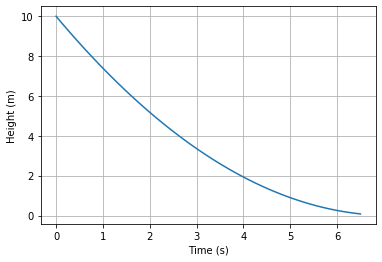

In [39]:
plt.figure(1)
plt.plot(t,h)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid()
plt.show()

### Solución ejercicio 4.2.b

In [40]:
def findh(n,h,t):
    hmin=1
    for ti,hi in zip(t,h):
      if(hi!=np.nan):  
        if(np.abs(hi-n)<hmin):
            tmin=ti
            hmin=hi-n
    return tmin


In [41]:
print(findh(2,h,t))

3.979591836734694


### Solución ejercicio 4.3.a

Que el tanque se está llenando pero cada vez lo hace más rápido

### Solución ejercicio 4.3.b

Significa que se vaciará más rápido

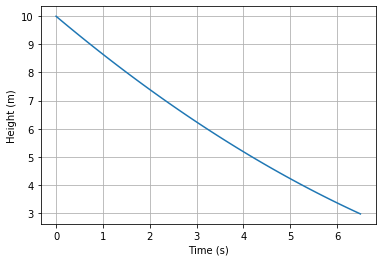

In [42]:
Ah=0.5#m^2
h = odeint(tank,h0,t)
plt.figure(1)
plt.plot(t,h)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid()
plt.show()

## <font color = red> Problema 5 <font>

### Modelo poblacional 

Simula la siguiente ecuación, y supoga que cada unidad de tiempo corresponde a un minuto.

$$\frac{ds}{dt} = 0.05s(\frac{s}{20}-1)(1-\frac{s}{100}) $$


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $200$ unidades de tiempo, con la condición inicial $s(0) = 21$  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) ¿En que tiempo aproximadamente la poblacion alcanza su maxima capacidad?
3. (15 puntos)
    - (5 puntos) ¿Cual es la capacidad de soporte de este modelo poblacional?
    - (10  puntos) ¿Que pasa con una condición inicial menor (s(0)=21) ? ¿Y con una condición mayor a la capacidad de soporte? 

In [43]:
s0=21
t = np.linspace(0,200)#valores a evaluar

In [44]:
def population(s,t):#Modelado
    dsdt=(0.05*s*(s/20-1)*(1-s/100))
    return dsdt

### Solución ejercicio 5.1

In [45]:
s = odeint(population,s0,t)

### Solución ejercicio 5.2.a

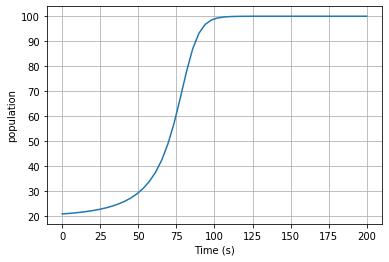

In [46]:
plt.figure(1)
plt.plot(t,s)
plt.xlabel('Time (s)')
plt.ylabel('population')
plt.grid()
plt.show()

### Solución ejercicio 5.2.b

In [47]:
def finds(n,margin,s,t):
    smin=100
    tmin=0
    for ti,si in zip(t,s):
        if(np.abs(1-(np.abs(si/n)-margin))<smin):
            tmin=ti
            smin=np.abs(1-(np.abs(si/n)-margin))
    return tmin

In [48]:
print(finds(100,-0.01,s,t))#Llegando al 1%

102.04081632653062


### Solución ejercicio 5.3.a

el sistema al paso del tiempo se estabiliza al rededor de 100

### Solución ejercicio 5.3.b

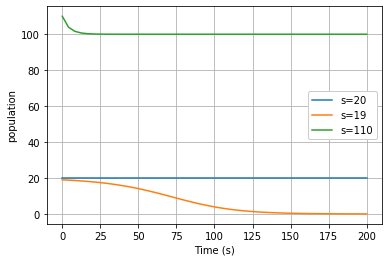

In [49]:
s1 = odeint(population,20,t)
s2 = odeint(population,19,t)
s3 = odeint(population,110,t)
plt.figure(1)
plt.plot(t,s1,label='s=20')
plt.plot(t,s2,label='s=19')
plt.plot(t,s3,label='s=110')
plt.legend(framealpha=1, frameon=True);
plt.xlabel('Time (s)')
plt.ylabel('population')
plt.grid()
plt.show()

## <font color = red> Problema 6 (estabilizar el sistema)<font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema no crezca, y se aproxime a 0 cuando t -> $\infty$.


$$\frac{ds}{dt} = 0.06u $$


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $800$ unidades de tiempo, con la condición inicial $s(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución.
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

In [50]:
s0 = 10

In [51]:
t = np.linspace(0,800)

In [52]:
def model(y,t):
    k = 0.06
    u = -0.2*y
    dydt = k * u
    return dydt


### Solución ejercicio 6.1

In [53]:
s = odeint(model,s0,t)

### Solución ejercicio 6.2

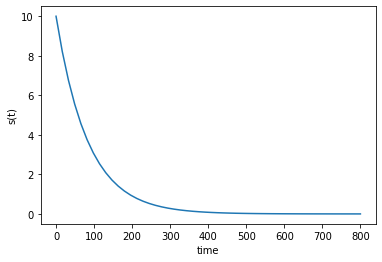

In [54]:
plt.plot(t,s)
plt.xlabel('time')
plt.ylabel('s(t)')
plt.show()

### Solución ejercicio 6.3:

$$u(t) = -0.4s(t) $$
$$\frac{ds}{dt} = 0.06(-0.4s(t)) $$

## <font color = red> Problema 7 <font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema no crezca, y se aproxime a 0 cuando t -> $\infty$.


$$\frac{dx}{dt} = 2x^2 + 0.06u $$


1. (20 puntos) Simula el sistema con la condición inicial $x(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución.
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

In [55]:
x0 = 10

In [56]:
t = np.linspace(0,800)

In [57]:
def model(y,t):
    k = 0.06
    u = -2/0.06 * (y**2) + -0.4*y
    dydt = 2*(y**2) + k*u
    return dydt

### Solución ejercicio 7.1

In [58]:
x = odeint(model,x0,t)

### Solución ejercicio 7.2

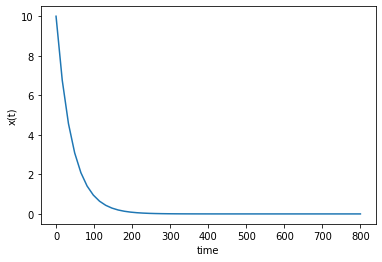

In [59]:
plt.plot(t,x)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

### Solución ejercicio 7.3

$$u(t) = -( \frac{2}{0.6}x^2 + x )$$
$$\frac{dx}{dt} = 2x^2 + 0.06u $$

## <font color = red> Problema 8 (seguimiento de trayectorias) <font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema siga una trayectoria. 


$$\frac{dx}{dt} = 2x^2 + 0.06u $$


1. (20 puntos) Simula el sistema con la condición inicial $x(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución siguiendo la funcion de referencia $ x_{ref} = sin(t) $
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

In [60]:
y0 = 10

In [61]:
def model(y,t):
    dydt =  -y + 0.6*np.sin(t*np.pi/4)
    return dydt

In [62]:
t = np.linspace(0,800)

### Solución ejercicio 8.1

In [63]:
y = odeint(model,y0,t)

### Solución ejercicio 8.2

In [64]:
x=0.55*np.sin(t*np.pi/4-0.61)

### Solución ejercicio 8.3

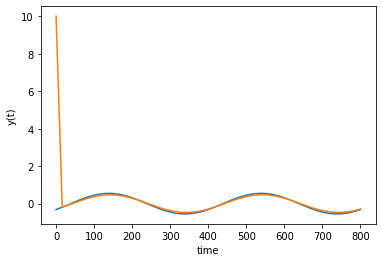

In [65]:
plt.plot(t,x)# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## <font color = red> Problema 9  <font>


Una empresa de transportes gestiona una flota de 60 carros de tres modelos diferentes. 

- Los tipo X generan una media diaria de $ \$15,000$  pesos. y recorren diariamente una media de $400$ kilómetros. 

- Los tipo Black generan diariamente una media de $\$10,000$ pesos y recorren $300$ kilómetros. 

- Los tipo SUV generan diariamente $\$5,000$ pesos y recorren $100$ km. de media.

Diariamente los carros de la empresa transportan un total de $ \$475$ mil pesos y recorren $12500$ km. entre todos. 

¿Cuántos carros gestiona la empresa de cada modelo?

In [66]:
A=np.array([[15000,10000,5000],[400,300,100],[1,1,1]])
b=np.array([475000,12500,60])

z=np.linalg.solve(A,b)
print("La empresa gestiona:", np.round(z[0]), "vehículos del tipo X, " ,np.round(z[1]), "del tipo Black y ",np.round(z[2]), "del tipo SUV")

La empresa gestiona: 5.0 vehículos del tipo X,  25.0 del tipo Black y  30.0 del tipo SUV


## <font color = red> Problema 10  <font>

Ace Novelty recibió un pedido del Magic World Amusement Park de **900 pandas gigantes, 1200 perros San Bernardo y 2000 pájaros grandes.** La dirección Ace decidió que **500 pandas, 800 perros y 1300 pájaros** pueden ser fabricados **en su planta de Los Ángeles**, y el **resto** del pedido podría realizarse **en la planta de Seattle.**

Cada **panda** requiere **1.5** metros cuadradas de felpa, **30** metros cúbicos de relleno y **5** piezas de adorno; cada **perro** requiere **2** metros cuadradas de felpa, **35** metros cúbicos de relleno y **8** piezas de adorno, y cada **pájaro** requiere **2.5** metros cuadrados de felpa, **25** metros cúbicos de relleno y **15** piezas de adorno. La felpa cuesta **\$4.50** por metro cuadrado, el relleno cuesta **\$0.20** por metros cúbico y las piezas de adorno cuestan **\$0.25** por unidad.

a. Calcule la cantidad de cada tipo de material que se debe comprar para cada planta.

b. ¿Cuál es el costo total de materiales empleados en cada planta y el costo total de los materiales usados por Ace Novelty para cubrir el pedido?

| |Felpa|Relleno|Adorno|
|---|---|---|---|
|Pandas|1.50|  30.00|  5.00|
|Perros|2.00|  35.00|  8.00|
|Pájaros|2.50|  25.00|  15.00|


| |Pandas|Perros|Pájaros|
|---|---|---|---|
|L.A|500|800|1300|
|Seattle|400|400|700|

| | |
|---|---|
|Felpa|4.50|
|Relleno|0.20|
|Adorno|0.25|

A=$\left[
 \begin{array}{ccc}
 1.50 & 30.00 & 5.00  \\
 2.00 & 35.00 & 8.00  \\
 2.50 & 25.00 & 15.00 \\
\end{array} 
\right]$,
P=
$\left[
 \begin{array}{ccc}
 500.00 & 800.00 & 1300.00 \\
 400.00 & 400.00 & 700.00  \\
\end{array} 
\right]$,
C=
$\left[
 \begin{array}{c}
 4.5  \\
 0.2  \\
 0.25
\end{array} 
\right]$

In [67]:
A = np.array([[1.5, 30, 5],[2, 35, 8],[2.5, 25, 15]])
P = np.array([[500, 800, 1300],[400,400,700]])
C = np.array([[4.5],[0.2],[0.25]])

In [68]:
# a:La cantidad de cada tipo de material para cada planta,

material_planta = np.dot(P,A)

print("Cantidad de cada tipo de material en Los Angeles:")
print("Felpa:",material_planta[0][0], "m2")
print("Relleno:",material_planta[0][1], "m3")
print("Adorno:",material_planta[0][2], "pieza(s)\n")

print("Cantidad de cada tipo de material en Seattle:")
print("Felpa:",material_planta[1][0], "m2")
print("Relleno:",material_planta[1][1], "m3")
print("Adorno:",material_planta[1][2], "pieza(s)\n")


Cantidad de cada tipo de material en Los Angeles:
Felpa: 5600.0 m2
Relleno: 75500.0 m3
Adorno: 28400.0 pieza(s)

Cantidad de cada tipo de material en Seattle:
Felpa: 3150.0 m2
Relleno: 43500.0 m3
Adorno: 15700.0 pieza(s)



In [69]:
#b:El costo total de los materiales para cada planta está dada por

costo_planta = np.dot(material_planta,C)

print("Costo total de materiales en Los Angeles:")
print("$", costo_planta[0][0],"\n")
print("Costo total de materiales en Seattle:")
print("$", costo_planta[1][0],"\n")

Costo total de materiales en Los Angeles:
$ 47400.0 

Costo total de materiales en Seattle:
$ 26800.0 



In [70]:
#Costo total

costo_total = costo_planta[0]+costo_planta[1]

print("Costo total para cubrir pedido:")
print("$", int(costo_total))

Costo total para cubrir pedido:
$ 74200


## <font color = red> Problema 10  <font>

Aproxima la función exponencial con n=20

$$e^x =\sum_{n=0}^{20} \frac{x^n}{n!}$$

In [71]:
def fact(a):    
    if(a==0):
        return 1
    f=1
    for i in range(1,a+1):
        f *= i
    return f   
def exp(x,n=20):
    sum=float()
    for i in range(n):
        sum += (x**i)/(fact(i))
    return sum

In [72]:
exp(2)

7.3890560989301735

## <font color = red> Problema 11  <font>
    
### Construir una cisterna rectangular

Se va a construir una cisterna rectangular con base y tapa cuadradas para almacenar **$12000pies^3$** de agua. Si el concreto para construir la base y los lados tiene un costo de **$100$ por $pie^2$** y el material para construir la **tapa** cuesta **$200$ por $pie^2$** 

¿cuáles son las dimensiones de la cisterna que minimizan el costo de su construcción?

¿Qué se quiere en el problema?

Determinar las dimensiones de la cisterna que minimizan el costo de su construcción.
Suponiendo que las dimensiones de la cisterna son: 
$x$ pies el lado de la base cuadrada y $h$ pies su altura.

¿Cuál es el costo de su construcción?

![](cisterna.png)

Para encontrar las dimensiones ($x$ & $h$) que minimizan el costo de su construcción se necesita la expresión del costo de la cisterna. Usamos la tabla siguiente:

![](tablacisterna.png)

El costo total de la contrucción de la cisterna es:

$$ C = 300x^2 + 400xh \text{   pesos}$$

En el problema aparece la siguiente restricción: **el volumen de la cisterna debe ser igual a $12 000 pies^3$, es decir, que $x^2h = 12000$.**

Tenemos pues:

Una función $C = 300x^2 + 400xh$ y una ecuación $x^2h = 12 000$.
De la ecuación despejamos una de las variables (la que más convenga) para sustituirla en la función. Conviene despejar $h$.

In [73]:
from scipy.optimize import minimize

In [74]:
#función objetivo
def Total_Cost(Dimensions):
    C = (300*Dimensions[0]**2)+(400*Dimensions[0]*Dimensions[1])
    return C

#restricción de volumen
def Volume(Dimensions):
    V = 12000
    V = V - (Dimensions[0]**2 * Dimensions[1])
    return V

initial_guess = [12,18]
Total_Cost(initial_guess)

129600

In [75]:
con_1 = {'type': 'ineq', 'fun':Total_Cost}
con_2 = {'type': 'eq', 'fun':Volume}
cons = [con_1,con_2]

In [76]:
bounds = (1.0,500.0)
bnds = [bounds,bounds]
solution = minimize(Total_Cost,initial_guess,method='SLSQP',\
                   bounds=bnds,constraints=cons)
solution

     fun: 359999.9999996771
     jac: array([24000.        ,  8000.00390625])
 message: 'Optimization terminated successfully.'
    nfev: 53
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([20.00000212, 29.99999365])

In [77]:
solution.fun, solution.x

(359999.9999996771, array([20.00000212, 29.99999365]))

[0, 60, 0, 1000000.0]

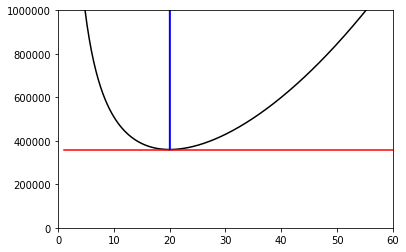

In [78]:
xdata = np.linspace(1,300,300*5)
hdata = 12000/xdata**2
Dimensions = [xdata,hdata]
C = Total_Cost(Dimensions)
Cost_Solution = Total_Cost(solution.x)
C_solution=[Cost_Solution]*len(xdata)

x_sol=[solution.x[0]]*len(xdata)
h_sol=[solution.x[1]]*len(xdata)

plt.figure()
plt.plot(xdata,C,'k', xdata,C_solution,'r',x_sol,C,'b')
plt.axis([0, 60, 0, 1e6])

[0, 60, 0, 1000000.0]

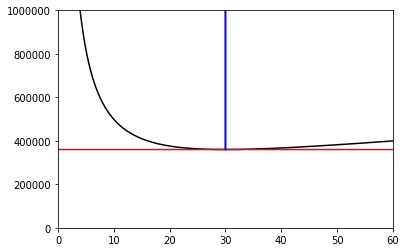

In [79]:
plt.figure()
plt.plot(hdata,C,'k', hdata,C_solution,'r',h_sol,C,'b')
plt.axis([0, 60, 0, 1e6])

## <font color = red> Problema 12  <font>
    

Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente.

¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?


![image.png](attachment:image.png)

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [81]:
#función objetivo
def obj_func(Package):
    Val_Pack1 = 6.5
    Val_Pack2 = 7
    return Val_Pack1*Package[0] + Val_Pack2*Package[1]

#constraint paquete 1
def constraint_paq1(Package):
    Cuadernos_Paq1=2
    Cuadernos_Paq2=3
    return 600 - (Cuadernos_Paq1*Package[0] + Cuadernos_Paq2*Package[1])

#constraint paquete 2
def constraint_paq2(Package):
    Boli_Paq1=2
    Boli_Paq2=1
    return 400 - (Boli_Paq1*Package[0] + Boli_Paq2*Package[1])

#constraint carpetas
def constraint_folders(Package):
    return 500 - (Package[0] + Package[1])

#función a maximizar
def objective(Package):
    return -obj_func(Package)

initial_guess = [300,200]
obj_func(initial_guess)

3350.0

In [82]:
con_1 = {'type': 'ineq', 'fun':constraint_paq1}
con_2 = {'type': 'ineq', 'fun':constraint_paq2}
con_fol = {'type': 'ineq', 'fun':constraint_folders}
cons = [con_1,con_2,con_fol]

In [83]:
solution = minimize(objective,initial_guess,method='SLSQP',\
                   constraints=cons)
solution

     fun: -1675.0000000074115
     jac: array([-6.5, -7. ])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([150., 100.])

In [84]:
solution.fun*-1, solution.x

(1675.0000000074115, array([150., 100.]))

## <font color = red> Problema 13 <font>
    
Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €.

¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

np.random.seed()

#función que representa el objetivo
def obj_fnc(Type_Pill):
    ben_x = 2 #beneficio de 2 euros
    ben_y = 1 #beneficio de 1 euro
    benefit = (ben_x*Type_Pill[0]) + (ben_y*Type_Pill[1]) 
    return benefit

#Restricción sobre material
def constraint_1(Weight_Pill):
    Wx = 40 #40 gramos por pildora grande
    Wy = 30 ##30 gramos por pildora grande
    Total_Weight = (Wx*Weight_Pill[0]) + (Wy*Weight_Pill[1])
    return 600 - Total_Weight

#Restricción mínimo de pastillas grandes
def constraint_x(Num_Pill):
    return Num_Pill[0] - 3

#restricción mínimo de pastillas pequeñas
def constraint_y(Benefit_Amnt):
    return Benefit_Amnt[1] - 2*Benefit_Amnt[0]

#función a optimizar
def objective(Type_Pill):
    return -obj_fnc(Type_Pill)

initial_guess = [4,8]
obj_fnc(initial_guess)

16

In [86]:
con_1 = {'type': 'ineq', 'fun':constraint_1}
con_x = {'type': 'ineq', 'fun':constraint_x}
con_y = {'type': 'ineq', 'fun':constraint_y}
cons = [con_1,con_x,con_y]

In [87]:
solution = minimize(objective,initial_guess,method='SLSQP',\
                   constraints=cons)
solution

     fun: -24.000000000000007
     jac: array([-2., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 6., 12.])

In [88]:
solution.fun*-1, solution.x

(24.000000000000007, array([ 6., 12.]))

## <font color = red> Problema 14 <font>

El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

### Input variables

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [89]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

banking = pd.read_csv('banking.csv')
print(banking.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [90]:
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [91]:
banking.rename(columns={'y':'willRespond'},inplace=True)
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'willRespond'],
      dtype='object')

In [92]:
banking.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True) #Removing unnecessary columns
banking.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
0,44,blue-collar,married,basic.4y,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [93]:
labels=banking.willRespond.values
labels

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [94]:
le=preprocessing.LabelEncoder()
le.fit(banking.poutcome)
list(le.classes_)

['failure', 'nonexistent', 'success']

In [95]:
#se les asigna u valor numérico a cada uno de los posibles estados para cada columna
banking.poutcome=le.transform(banking.poutcome)
banking.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
0,44,blue-collar,married,basic.4y,yes,no,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [96]:
banking.housing = le.fit_transform(banking.housing)
banking.loan=le.fit_transform(banking.loan)
banking.job=le.fit_transform(banking.job)
banking.marital=le.fit_transform(banking.marital)
banking.education=le.fit_transform(banking.education)
banking.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


(array([1.6660e+03, 1.1343e+04, 1.2037e+04, 8.0870e+03, 5.8230e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

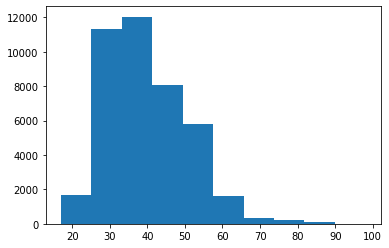

In [97]:
plt.hist(banking.age)

In [98]:
banking['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [99]:
banking.apply(lambda x: len(x.unique()))

age                78
job                12
marital             4
education           8
housing             3
loan                3
campaign           42
previous            8
poutcome            3
emp_var_rate       10
cons_price_idx     26
cons_conf_idx      26
euribor3m         316
nr_employed        11
willRespond         2
dtype: int64

In [100]:
features = banking[['age','job','marital','education','housing','loan','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed' ]]
features.head()

,age,job,marital,education,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,2,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,7,0,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,6,2,0,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,3,0,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,2,0,2,-2.9,92.201,-31.4,0.869,5076.2


In [101]:
banking_dummies = pd.get_dummies(features)
banking_dummies.head()

,age,job,marital,education,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,2,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,7,0,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,6,2,0,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,3,0,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,2,0,2,-2.9,92.201,-31.4,0.869,5076.2


In [102]:
banking_dummies.isna().any()

age               False
job               False
marital           False
education         False
housing           False
loan              False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
dtype: bool

In [103]:
banking_dummies_train = banking_dummies.dropna()
banking_dummies_train.isna().any()

age               False
job               False
marital           False
education         False
housing           False
loan              False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
dtype: bool

In [104]:
labels_train = labels[banking_dummies_train.index]
banking_dummies_train.head()

,age,job,marital,education,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,2,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,7,0,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,6,2,0,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,3,0,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,2,0,2,-2.9,92.201,-31.4,0.869,5076.2


In [105]:
# LogisticRegression

In [106]:
model = LogisticRegression(solver='lbfgs',max_iter=2000)
model.fit(banking_dummies_train,labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
#real, # Predict
labels_train ,model.predict(banking_dummies_train) 

(array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64))

In [108]:
true_predict = sum(model.predict(banking_dummies_train) ==  labels_train)
true_predict

36962

In [109]:
true_ratio = sum(model.predict(banking_dummies_train) ==  labels_train) / (len(labels_train))
true_ratio

0.8973973001845198

In [110]:
print("logistic regression score: %f" % model.score(banking_dummies_train, labels_train))

logistic regression score: 0.897397


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
train_data, test_data, train_labels, test_labels = train_test_split(banking_dummies_train, labels_train,
                                                                    random_state=0,test_size=0.33)

In [113]:
train_data.shape,test_data.shape

((27595, 12), (13593, 12))

In [114]:
model = LogisticRegression(solver='lbfgs',max_iter=2000).fit(train_data,train_labels)
print("Logistic regression score: %f" % model.score(test_data,test_labels))

Logistic regression score: 0.899434


In [115]:
features = banking[['age','job','marital','education',
                    'housing','loan','poutcome','emp_var_rate',
                    'cons_price_idx','cons_conf_idx','euribor3m','nr_employed' ]]

features = pd.get_dummies(features, columns=['age', 'job', 'education', 'loan', 'poutcome'])
labels = labels[features.index]

train_data, test_data, train_labels, test_labels = train_test_split(features, labels_train,
                                                                    random_state=0,test_size=0.33)

model = LogisticRegression(solver="lbfgs",max_iter=1000).fit(train_data, train_labels)
print("logistic regression score: %f" % model.score(test_data, test_labels))

logistic regression score: 0.899654


In [116]:
guess = model.predict(test_data) == test_labels
guess

array([ True,  True,  True, ...,  True,  True,  True])

(array([13172.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   421.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

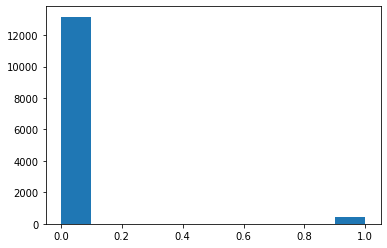

In [117]:
plt.hist(model.predict(test_data))